# Census Report Project Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Importing file and check first 5 rows:

In [2]:
# Import CSV file and see first 5 rows:
census = pd.read_csv("census2_wed-Copy1.csv.")
census.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,NaN,Christian
1,2,Kaur Drive,Hollie,West,79.0,Head,Single,Female,Retired Dealer,NaN,Christian
2,3,Kaur Drive,Joseph,Hall,55.0,Head,Single,Male,Fast food restaurant manager,NaN,Christian
3,4,Kaur Drive,Gregory,Cox,35.0,Head,Single,Male,Housing manager/officer,NaN,NaN
4,5,Kaur Drive,Lydia,Jones,42.0,Head,Single,Female,Unemployed,NaN,Catholic


# Summary of the Dataframe

In [3]:
# summary of the DataFrame
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   10118 non-null  int64  
 1   Street                         10118 non-null  object 
 2   First Name                     10118 non-null  object 
 3   Surname                        10118 non-null  object 
 4   Age                            10118 non-null  float64
 5   Relationship to Head of House  9356 non-null   object 
 6   Marital Status                 7634 non-null   object 
 7   Gender                         10118 non-null  object 
 8   Occupation                     10118 non-null  object 
 9   Infirmity                      84 non-null     object 
 10  Religion                       4123 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 869.6+ KB


# Count the number of missing values(NaN values)

In [4]:
# count the number of missing values (NaN values):
print(census.isna().sum())

House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House      762
Marital Status                    2484
Gender                               0
Occupation                           0
Infirmity                        10034
Religion                          5995
dtype: int64


# Checking the Dataype:

In [5]:
# checking the data types for each column
census.dtypes

House Number                       int64
Street                            object
First Name                        object
Surname                           object
Age                              float64
Relationship to Head of House     object
Marital Status                    object
Gender                            object
Occupation                        object
Infirmity                         object
Religion                          object
dtype: object

# Converting the Datatype:

In [6]:
# here we can see age is in float however, age must be in integer
census["Age"] = census["Age"].astype('int64')

In [7]:
# now again checking the data types for each column
census.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               int64
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

# Columns with missing values:

In [8]:
# columns with missing values:
cols_with_missing_values = census.columns[census.isna().sum()>0]
print(cols_with_missing_values)

Index(['Relationship to Head of House', 'Marital Status', 'Infirmity',
       'Religion'],
      dtype='object')


# Cleaning and Filling Relationship to Head of House

In [9]:
# checking number of NaN values:
census["Relationship to Head of House"].isna().sum()

762

In [10]:
# Fill the missing values in 'Relationship to Head of House' column:
def fill_relationship(row):
    if pd.isna(row['Relationship to Head of House']):
        # Check if the 'Relationship to Head of House' for the same 'House Number' and 'Street' is already filled
        same_house = census.loc[(census['House Number'] == row['House Number']) & (census['Street'] == row['Street']) 
        & (~census['Relationship to Head of House'].isna()), 'Relationship to Head of House'].values
        if 'Head' in same_house:
            # If there is already a 'Head' in the same house, assign 'Child', 'Spouse', or 'Lodger/Visitor' based on age, marital status, and gender
            if row['Age'] < 18:
                return 'Child'
            elif row['Marital Status'] == 'Married':
                return 'Spouse'
            else:
                return 'Lodger/Visitor'
        elif len(same_house) > 0:
            # If there is no 'Head' in the same house, fill with the existing value, but check for gender mismatch
            existing_value = same_house[0]
            if ('Daughter' in existing_value and row['Gender'] == 'Male') or ('Son' in existing_value and row['Gender'] == 'Female'):
                # If there is a gender mismatch, assign 'Child' instead
                return 'Child'
            else:
                return existing_value
        elif row['Age'] < 18:
            # Assume it's a child if age is less than 18
            return 'Child'
        else:
            # Assume it's a lodger/visitor if age is 18 or above
            return 'Lodger/Visitor'
    else:
        return row['Relationship to Head of House']

# Apply the function to the 'Relationship to Head of House' column
census['Relationship to Head of House'] = census.apply(fill_relationship, axis=1)

In [11]:
census["Relationship to Head of House"].isna().sum()

0

In [12]:
# Checking Empty Strings:
census["Relationship to Head of House"].unique()

array(['Head', 'Son', 'Granddaughter', 'Daughter', 'Husband', 'Wife',
       'Grandson', 'Visitor', 'Lodger', 'Lodger/Visitor', 'Partner',
       'Adopted Son', 'Step-Son', 'Step-Daughter', 'Sibling', 'Cousin',
       'Nephew', 'Adopted Daughter', 'Neice', 'Spouse', 'Child',
       'Adopted Grandson', ' '], dtype=object)

In [13]:
# Replace empty strings with NaN
census['Relationship to Head of House'] = census['Relationship to Head of House'].replace(' ', np.nan)

# Fill the NaN values with a default value (e.g., 'Unknown')
census['Relationship to Head of House'] = census['Relationship to Head of House'].fillna('Unknown')

In [14]:
# Checking Empty Strings:
census["Relationship to Head of House"].unique()

array(['Head', 'Son', 'Granddaughter', 'Daughter', 'Husband', 'Wife',
       'Grandson', 'Visitor', 'Lodger', 'Lodger/Visitor', 'Partner',
       'Adopted Son', 'Step-Son', 'Step-Daughter', 'Sibling', 'Cousin',
       'Nephew', 'Adopted Daughter', 'Neice', 'Spouse', 'Child',
       'Adopted Grandson', 'Unknown'], dtype=object)

In [15]:
# correcting Niece
# Replace 'Neice' with 'Niece' in the 'Relationship to Head of House' colum

census['Relationship to Head of House'] = census['Relationship to Head of House'].replace('Neice', 'Niece')

# Now 'Neice' should be replaced with 'Niece' in the 'Relationship to Head of House' column


In [16]:
# Checking Corrected Strings:
census["Relationship to Head of House"].unique()

array(['Head', 'Son', 'Granddaughter', 'Daughter', 'Husband', 'Wife',
       'Grandson', 'Visitor', 'Lodger', 'Lodger/Visitor', 'Partner',
       'Adopted Son', 'Step-Son', 'Step-Daughter', 'Sibling', 'Cousin',
       'Nephew', 'Adopted Daughter', 'Niece', 'Spouse', 'Child',
       'Adopted Grandson', 'Unknown'], dtype=object)

# Cleaning and Filling Martial Status:

In [17]:
# checking number of NaN values:
census["Marital Status"].isna().sum()

2484

In [18]:
# check the martial status column for below 18:
census[(census['Age'] < 18) & (census['Marital Status'].isin(['Widowed', 'Married', 'Divorced']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9582,18,Estuary Roads,Marie,Patterson,17,Head,Married,Female,Student,NaN,NaN


In [19]:
# update the Martial Status to Single for rows where 'Age' is less than 18
census.loc[census['Age'] < 18, 'Marital Status'] = 'Single'

In [20]:
# Again check the row where marital status updated or not
census[(census['Age'] < 18) & (census['Marital Status'].isin(['Widowed', 'Married', 'Divorced']))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [21]:
# Fill the missing values in 'Marital Status' column:

def fill_marital_status(row):
    if pd.isna(row['Marital Status']):
        # Check if the 'Marital Status' for the same 'House Number' and 'Street' is already filled
        same_house = census.loc[(census['House Number'] == row['House Number']) & (census['Street'] == row['Street']) 
        & (~census['Marital Status'].isna()), 'Marital Status'].values
        if len(same_house) > 0:
            # If there is an existing value for the same house, check if it contradicts the 'Relationship to Head of House'
            existing_value = same_house[0]
            relationship = row['Relationship to Head of House']
            if (existing_value == 'Divorced' and relationship in ['Wife', 'Husband']) or (existing_value == 'Married' and relationship not in 
                                                                                          ['Wife', 'Husband']):
                # If there is a contradiction, ignore the existing value and proceed with other logic
                pass
            else:
                # If there is no contradiction, fill with the existing value
                return existing_value
        elif row['Age'] < 18:
            # Assume 'Single' if age is less than 18
            return 'Single'
        elif row['Relationship to Head of House'] in ['Child']:
            # Assume 'Single' for 'Child' relationship
            return 'Single'
        elif row['Relationship to Head of House'] in ['Son', 'Daughter', 'Grandson', 'Granddaughter'] and row['Age'] < 18:
            # Assume 'Single' for 'Son', 'Daughter', 'Grandson', 'Granddaughter' relationships if age is less than 18
            return 'Single'
        else:
            # For other cases, assume 'Unknown'
            return 'Unknown'
    else:
        return row['Marital Status']

# Apply the function to the 'Marital Status' column
census['Marital Status'] = census.apply(fill_marital_status, axis=1)

In [22]:
# Again checking number of NaN values:
census["Marital Status"].isna().sum()

0

In [23]:
# checking unique values for marital status:
census["Marital Status"].unique()

array(['Widowed', 'Single', 'Married', 'Divorced', ' '], dtype=object)

In [24]:
# Replace empty strings with NaN
census['Marital Status'] = census['Marital Status'].replace(' ', np.nan)

# Fill the NaN values with a default value (e.g., 'Unknown')
census['Marital Status'] = census['Marital Status'].fillna('Unknown')

In [25]:
# Again Checking Empty Strings:
census["Marital Status"].unique()

array(['Widowed', 'Single', 'Married', 'Divorced', 'Unknown'],
      dtype=object)

# Cleaning and Filling Religion:

In [26]:
# checking number of NaN values:
census["Religion"].isna().sum()

5995

In [27]:
# Define a funtion to fill missing 'Religion' values:

def filling_religion(row, group_data):
    # check if the 'Religion value is missing for the current row'
    if pd.isna(row['Religion']):
        #house_street_group contains value with the same 'House number' and 'street '
        house_street_group = group_data.get_group((row['House Number'], row['Street']))

        #religions variable contains unique non-null 'Religion' values having the same 'House Number' and 'Street' 
        religions = house_street_group['Religion'].dropna().unique()
        

        # If there's only one unique religion within house_street_group, return it; otherwise, return 'unknown'
        if len(religions) == 1:
            return religions[0]
        else:
            return 'Undecided'

        # If the religion value is not missing , return the religion
    else:
        return row['Religion']

# group the data by 'Street Number' and 'Street Name'
group_data = census.groupby(['House Number' , 'Street'])

#Apply the 'fill_missing_religion' function to fill in missing 'Religion' values
census['Religion'] = census.apply(lambda row: filling_religion(row, group_data), axis = 1)

In [28]:
#Again Checking NaN Values:
census["Religion"].isna().sum()

0

In [29]:
# checking unique values  for Religion:
census["Religion"].unique()

array(['Christian', 'Undecided', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Pagan', 'Agnostic', 'Bahai', ' ', 'Scientology',
       'Nope', 'Secular'], dtype=object)

In [30]:
# Replace empty strings with NaN
census['Religion'] = census['Religion'].replace(' ', np.nan)

# Fill the NaN values with a default value (e.g., 'Unknown')
census['Religion'] = census['Religion'].fillna('Undecided')

In [31]:
# Again checking unique values for Religion:
census["Religion"].unique()

array(['Christian', 'Undecided', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Pagan', 'Agnostic', 'Bahai', 'Scientology',
       'Nope', 'Secular'], dtype=object)

In [32]:
# Nope and Undecided means the same so replace Nope with Undecided

census['Religion'] = census['Religion'].replace('Nope', 'Undecided')


In [33]:
# Again checking unique values for Religion:
census["Religion"].unique()

array(['Christian', 'Undecided', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Pagan', 'Agnostic', 'Bahai', 'Scientology',
       'Secular'], dtype=object)

# Cleaning and Filling Infirmity:

In [34]:
# checking number of NaN values:
census["Infirmity"].isna().sum()

10034

In [35]:
# Fill the missing values in the 'Infirmity' column with 'Unknown'
census['Infirmity'] = census['Infirmity'].fillna('Unknown')

In [36]:
# checking unique values for Infirmity:
census["Infirmity"].unique()

array(['Unknown', 'Disabled', 'Blind', 'Mental Disability', 'Deaf', ' ',
       'Physical Disability', 'Unknown Infection'], dtype=object)

In [37]:
census["Infirmity"].value_counts()

Infirmity
Unknown                10034
Physical Disability       19
Blind                     15
Deaf                      13
Disabled                  10
                          10
Unknown Infection         10
Mental Disability          7
Name: count, dtype: int64

In [38]:
# Again checking number of NaN values:
census["Infirmity"].isna().sum()

0

In [39]:
# Replace empty strings with NaN
census['Infirmity'] = census['Infirmity'].replace(' ', np.nan)

# Fill the NaN values with a default value (e.g., 'Unknown')
census['Infirmity'] = census['Infirmity'].fillna('Unknown')

In [40]:
# Again checking unique values for Religion:
census["Infirmity"].unique()

array(['Unknown', 'Disabled', 'Blind', 'Mental Disability', 'Deaf',
       'Physical Disability', 'Unknown Infection'], dtype=object)

# Checking House Number Column

In [41]:
# Extract Empty string in House Number
census[census["House Number"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Checking Street Column

In [42]:
# Extract Empty string in Street
census[census["Street"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Checking First Name Column

In [43]:
# Extract Empty string in First Name
census[census["First Name"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Checking Surname Column

In [44]:
# Extract Empty string in Surname
census[census["Surname"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1152,27,Whittaker Crescent,Harry,,26,Husband,Married,Male,Charity officer,Unknown,Undecided
4251,12,Clementine Forest,Lesley,,64,Wife,Married,Female,Forensic scientist,Deaf,Christian
8240,121,O'Connor Crossroad,Irene,,75,Daughter,Divorced,Female,Retired Magazine journalist,Unknown,Muslim


In [45]:
# Now we fill the surname column based on House Number and Street
census['Surname'] = census.groupby(['House Number', 'Street'])['Surname'].transform('first')

In [46]:
# Extract Empty rows in Surname
census[census["Surname"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Checking Age Column

In [47]:
# Extract Empty string in Age
census[census["Age"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [48]:
# checking unique values for Age:
census["Age"].unique()

array([ 77,  79,  55,  35,  42,   3,  80,  12,  76,  46,  27,   2,  54,
         1,  70,  72,  34,  68,  40,  37,  48,  38,   8,  75,  67,  89,
        88,  64,   0,  49,  22,  59,  36,  44,  60,  11,  23,  29,  58,
        50,  20,  21,  17,  14,  33,  10,  31,  47,  16,  19,  41,  43,
         5,  57,   9,  28,  32,  45,  53,  15,  39,  30,  78,  63,  51,
        52,  74,  18,  66,  69,  83,  86,  25,  24,  62,  13,  81,   4,
        73,   6,  61,  26,  56,  65,   7,  82,  84,  87,  92,  90,  71,
       105,  85, 106,  99,  97,  96, 103, 104, 108,  91, 102,  94,  95,
        98, 101, 109, 111, 120,  93], dtype=int64)

# Checking Gender Column

In [49]:
# checking unique values for Gender:
census["Gender"].unique()

array(['Male', 'Female', ' '], dtype=object)

In [50]:
# Extract Empty rows in Gender
census[census["Gender"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
273,7,Kraken Road,Dale,Powell,79,Head,Married,,Retired TEFL teacher,Unknown,Undecided


In [51]:
#Extracting rows with same House Number and Street
census[(census["House Number"] == 7) & (census["Street"] == "Kraken Road")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
273,7,Kraken Road,Dale,Powell,79,Head,Married,,Retired TEFL teacher,Unknown,Undecided
274,7,Kraken Road,Jessica,Powell,78,Wife,Married,Female,"Retired Journalist, newspaper",Unknown,Undecided


In [52]:
# census["Gender"].str.strip() == "" checks for empty strings after stripping any leading or trailing whitespace. This ensures that empty strings with any additional whitespace are also identified
census.loc[((census["House Number"] == 7) & (census["Street"] == "Kraken Road") & (census["Gender"].str.strip() == "")), 'Gender'] = 'Male'

In [53]:
# checking unique values for Gender:
census["Gender"].unique()

array(['Male', 'Female'], dtype=object)

# Checking Occupation Column:

In [54]:
# checking Empty String values for Occupation:
census[census["Occupation"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Age Pyramid:

pyramid_data pd.cut          Age  Count  Gender
0      70-79      1    Male
1      70-79      1  Female
2      50-59      1    Male
3      30-39      1    Male
4      40-49      1  Female
...      ...    ...     ...
10113    0-9      1    Male
10114    0-9      1  Female
10115    0-9      1    Male
10116  50-59      1  Female
10117  40-49      1  Female

[10118 rows x 3 columns]


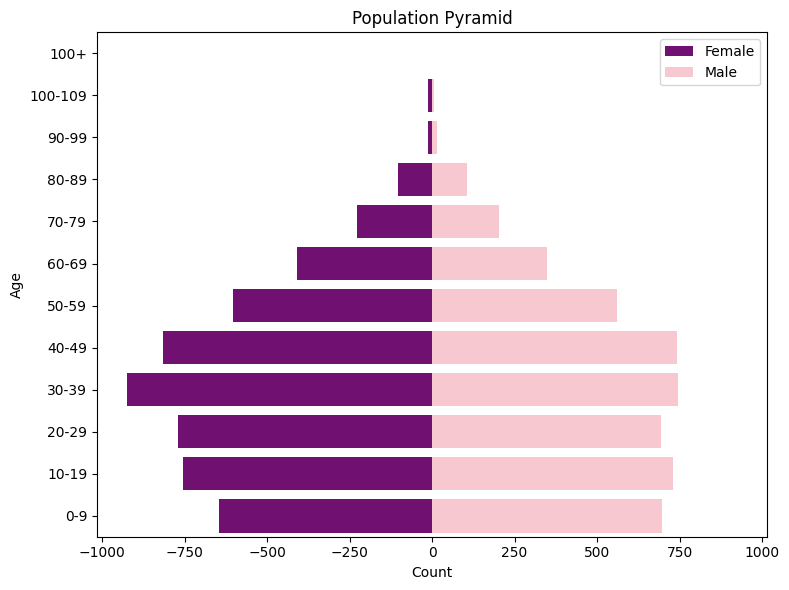

In [55]:
 # Find the maximum age in the data
max_age = census['Age'].max()
 
# Split ages by gender
male_ages = census[census['Gender'] == 'Male']['Age']
female_ages = census[census['Gender'] == 'Female']['Age']
 
# Define age groups as a list of bin edges
age_groups = np.arange(0, max_age + 10, 10)
  
# Define age group labels
age_class = [f'{i}-{j-1}' for i, j in zip(age_groups[:-1], age_groups[1:])]
age_class[-1] = '100+'  # Set the last label to '100+'
  
# Create a DataFrame with age groups and counts
pyramid_data = pd.DataFrame({'Age': pd.cut(census['Age'], bins=age_groups, labels=age_class, right=False, include_lowest=True),
                              'Count': 1,
                              'Gender': census['Gender']})
 
print('pyramid_data pd.cut', pyramid_data)
 
# Aggregate the counts by age group and gender
pyramid_data = pyramid_data.groupby(['Age', 'Gender']).size().reset_index(name='Count')
 
# Pivot the data to have gender as columns and age as rows
pyramid_data = pyramid_data.pivot(index='Age', columns='Gender', values='Count').fillna(0)
  
# Convert female counts to negative values
pyramid_data['Female'] = -pyramid_data['Female']
 
# Replace NaN or infinite values with 0 (or any other desired value)
pyramid_data = pyramid_data.replace([np.inf, -np.inf], 0)
 
# Reverse the order of the age groups
pyramid_data = pyramid_data.reindex(index=age_class[::-1])
 
# Plot the population pyramid
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=pyramid_data, x='Female', y=pyramid_data.index, color='purple', label='Female', orient='h', order=age_class[::-1])
sns.barplot(data=pyramid_data, x='Male', y=pyramid_data.index, color='pink', label='Male', orient='h', order=age_class[::-1])
 
# Customize the plot
ax.set_xlabel('Count')
ax.set_ylabel('Age')
ax.set_title('Population Pyramid')
ax.legend()
 
# Set the x-axis limits to center the pyramid
max_count = max(abs(pyramid_data['Female'].min()), pyramid_data['Male'].max())
ax.set_xlim(-max_count * 1.1, max_count * 1.1)  # Add a 10% buffer on both sides
 
plt.tight_layout()
plt.show()

fig.savefig('age_pyramid.png', bbox_inches='tight') 

In [56]:
total_population = pyramid_data['Male'].sum() + abs(pyramid_data['Female'].sum())
print(f'Total population: {total_population}')

Total population: 10117


In [57]:
total_population = pyramid_data['Male'].sum() + abs(pyramid_data['Female'].sum())
total_females = abs(pyramid_data['Female'].sum())
female_percentage = (total_females / total_population) * 100
total_males = pyramid_data['Male'].sum()
male_percentage = (total_males / total_population) * 100

print(f'Total population: {total_population}')
print(f'Total number of females: {total_females} ({female_percentage}%)')
print(f'Total number of males: {total_males} ({male_percentage}%)')

Total population: 10117
Total number of females: 5269 (52.08065632104378%)
Total number of males: 4848 (47.91934367895621%)


In [58]:
# Calculate the median age
median_age = np.median(census['Age'])

print(f'The median age of the town is {median_age} years.')

The median age of the town is 34.0 years.


# Examine : Birth & Death Rate

In [84]:
# Extracting children aged 0 years
census[census['Age'] == 0]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
33,7,Lime Road,Stephen,Jones,0,Grandson,Single,Male,Child,Unknown,Christian
227,25,Kennedy Avenue,Ronald,Butler,0,Son,Single,Male,Child,Unknown,Methodist
416,32,Arnold Springs,Keith,Jones,0,Son,Single,Male,Child,Disabled,Undecided
502,29,Kraken Drive,Emily,Coates,0,Daughter,Single,Female,Child,Unknown,Undecided
524,36,Kraken Drive,Olivia,Briggs,0,Daughter,Single,Female,Child,Unknown,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9471,5,Todd Trail,Emily,Roberts,0,Daughter,Single,Female,Child,Unknown,Catholic
9584,18,Estuary Roads,Vanessa,Patterson,0,Daughter,Single,Female,Child,Unknown,Christian
9894,6,Smith Mews,Frances,Richards,0,Daughter,Single,Female,Child,Unknown,Christian
10047,1,Edwards Lighthouse,Amy,Perry,0,Daughter,Single,Female,Child,Unknown,Catholic


In [60]:
# Extracting children aged 0 years
children_age_0 = census['Age'].value_counts()[0]
children_age_0

110

In [61]:
census['Age'].value_counts()

Age
36     197
19     188
40     182
22     180
39     177
      ... 
120      1
106      1
109      1
95       1
93       1
Name: count, Length: 110, dtype: int64

In [62]:
# Extracting women age between 25 to 29
women_age_25_29 = census[(census['Age'] >= 25) & (census['Age'] <= 29)]['Gender'].value_counts()['Female']
women_age_25_29

371

In [63]:
# calculating birth percentage
birth_percentage = children_age_0 / women_age_25_29
birth_percentage * 100

29.649595687331537

In [64]:
# calculating death percentage

# Calculate the total population for ages 56-60
people_age_56_60 = census[(census['Age'] >= 56) & (census['Age'] <= 60)]['Gender'].value_counts().sum()

# Calculate the total population for ages 61-65
people_age_61_65 = census[(census['Age'] >= 61) & (census['Age'] <= 65)]['Gender'].value_counts().sum()

# Calculate the total population for ages 66-70
people_age_66_70 = census[(census['Age'] >= 66) & (census['Age'] <= 70)]['Gender'].value_counts().sum()

# Calculate the total population for ages 71-75
people_age_71_75 = census[(census['Age'] >= 71) & (census['Age'] <= 75)]['Gender'].value_counts().sum()

# Calculate the estimated deaths for ages 56-65
estimated_deaths_56_65 = people_age_56_60 - people_age_61_65

# Calculate the estimated deaths for ages 66-75
estimated_deaths_66_75 = people_age_66_70 - people_age_71_75

# Print the estimated deaths for ages 56-65
print(f"Estimated deaths for ages 56-65: {estimated_deaths_56_65}")
# Print the estimated deaths for ages 66-75
print(f"Estimated deaths for ages 66-75: {estimated_deaths_66_75}")


# Calculate the total estimated deaths
total_estimated_deaths = estimated_deaths_56_65 + estimated_deaths_66_75

# Calculate the total population
total_population = people_age_56_60 + people_age_61_65 + people_age_66_70 + people_age_71_75

# Calculate the overall death percentage
overall_death_percentage = (total_estimated_deaths / total_population) * 100

# Print the overall death percentage
print(f"Overall death percentage: {overall_death_percentage:.2f}%")

Estimated deaths for ages 56-65: 64
Estimated deaths for ages 66-75: 63
Overall death percentage: 8.85%


# Examine Population Growth Rate 

In [85]:
# Convert the current_population variable to a float if it's an integer
current_population = float(10117)  # Example population

# Define the growth_rate
growth_rate = 0.01  # Example growth rate (1%)

# Estimate the population growth for the next year
estimated_population = current_population * (1 + growth_rate)

# Calculate the population growth in percentage
population_growth_percentage = (estimated_population - current_population) / current_population * 100

# Print the results
print(f'Estimated population for the next year: {estimated_population:,}')
print(f'Estimated population growth: {population_growth_percentage:.2f}%')

Estimated population for the next year: 10,218.17
Estimated population growth: 1.00%


# Examine Religion affiliations:

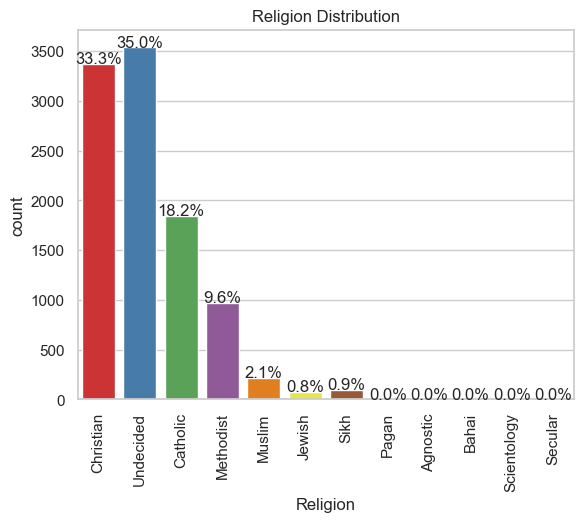

In [66]:

sns.set(style="whitegrid")


# Create the countplot
ax = sns.countplot(data = census, x= 'Religion', palette = sns.color_palette("Set1"))
ax.set_title('Religion Distribution')

# Get the current figure
fig = plt.gcf()

# Calculate the total population
total_population = len(census)

# Iterate through each patch
for i, p in enumerate(ax.patches):
    # Calculate the percentage of each patch
    percentage = p.get_height() / total_population * 100
    # Add the percentage as a text label above each patch
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height() + 3), ha='center')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

#save the figure
fig.savefig('religion_countplot.png', bbox_inches='tight') 

# Examine Marriage and Divorce Rate:

In [67]:

# Filter the dataset to only include rows where Marital Status is not null
marital_status_data = census[census['Marital Status'].notnull()]

# Create a dictionary to map marital status categories to labels
marital_status_map = {'Married': 'Married', 'Divorced': 'Divorced'}

# Count the number of occurrences for each marital status category
marital_status_counts = marital_status_data['Marital Status'].value_counts()

# Calculate the marriage and divorce rates
marriage_rate = marital_status_counts[marital_status_map['Married']] / len(census) 
divorce_rate = marital_status_counts[marital_status_map['Divorced']] / len(census) 

# Print the results
print(f'Marriage rate: {marriage_rate:.2f}')
print(f'Divorce rate: {divorce_rate:.2f}')

Marriage rate: 0.26
Divorce rate: 0.09


In [68]:
# Calculate the marriage rate per thousand
marriage_count = len(census[census['Marital Status'] == 'Married'])
marriage_rate_per_thousand = marriage_count / len(census) * 1000

# Calculate the divorce rate per thousand
divorce_count = len(census[census['Marital Status'] == 'Divorced'])
divorce_rate_per_thousand = divorce_count / len(census) * 1000

# Print the results
print(f'Marriage rate per thousand: {marriage_rate_per_thousand:.2f}')
print(f'Divorce rate per thousand: {divorce_rate_per_thousand:.2f}')

Marriage rate per thousand: 264.08
Divorce rate per thousand: 86.08


In [69]:
# Count the number of occurrences of each marital status category
marital_status_counts = census['Marital Status'].value_counts()

# Select the 'Married' category and print the result
married_count = marital_status_counts['Married']
print(f'Estimated number of married individuals: {married_count}')

# Select the 'Divorced' category and print the result
divorced_count = marital_status_counts['Divorced']
print(f'Estimated number of divorced individuals: {divorced_count}')

Estimated number of married individuals: 2672
Estimated number of divorced individuals: 871


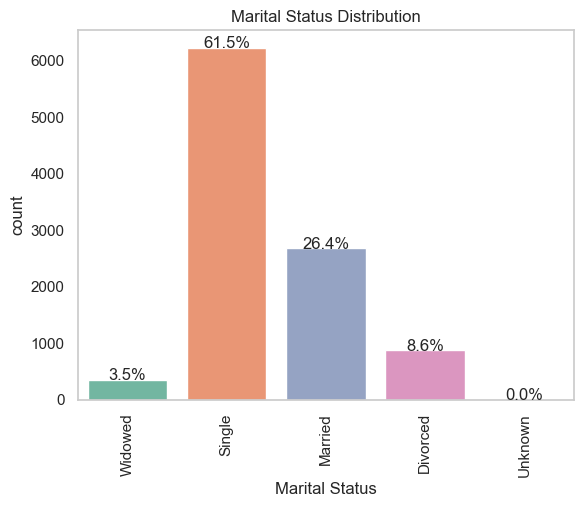

In [83]:


# Create the countplot
ax = sns.countplot(data=census, x="Marital Status", palette="Set2")

# Add percentage labels to each bar
total_count = len(census)
for p in ax.patches:
    percentage = p.get_height() / total_count * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')

# Remove grid lines
plt.grid(False)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Set the plot title
ax.set_title('Marital Status Distribution')

# Show the plot
plt.show()

# Save the figure
#plt.savefig('marital_status_distribution.png', bbox_inches='tight')

# Examine Occupancy Level:

In [71]:
# Calculate the total number of houses by counting the unique house numbers and streets
total_houses = census['House Number'].nunique() * census['Street'].nunique()

# Print the result
print(f'The total number of houses in the town is {total_houses}.')

The total number of houses in the town is 22048.


In [72]:


# Group the rows based on the 'House Number' and 'Street' columns
grouped_census = census.groupby(['House Number', 'Street'])

# Count the number of rows in each group
group_counts = grouped_census.size()

# Convert the Series of group counts into a DataFrame
group_counts_df = group_counts.reset_index(name='Count')

# Sort the DataFrame by the 'Count' column in descending order
group_counts_df = group_counts_df.sort_values(by='Count', ascending=False)
print(group_counts_df)


# Calculate the average of the 'Count' column
median_count = group_counts_df['Count'].median()


# Keep only the groups where 'Count' is greater than or equal to mean
group_counts_df = group_counts_df[group_counts_df['Count'] >= median_count]

print(f"Median of the 'Count' column: {median_count:.2f}")




      House Number              Street  Count
2980           121  O'Connor Crossroad     22
3123           182  O'Connor Crossroad     22
381              5         Atkins Road     22
3027           134  O'Connor Crossroad     21
1894            28        Crown Branch     21
...            ...                 ...    ...
1545            20     Prince Parkways      1
1542            20           Oak Manor      1
1537            20         Martin Road      1
1536            20       Lincoln Drive      1
1579            21    Hangar Crossroad      1

[3159 rows x 3 columns]
Median of the 'Count' column: 3.00


# Examine Occupation

In [73]:
census["Occupation"].value_counts()

Occupation
Student                                 2014
University Student                       669
Unemployed                               615
Child                                    596
PhD Student                               27
                                        ... 
Retired Hospital pharmacist                1
Retired Designer, industrial/product       1
Retired Copy                               1
Retired Financial controller               1
Retired Conservator, furniture             1
Name: count, Length: 1100, dtype: int64

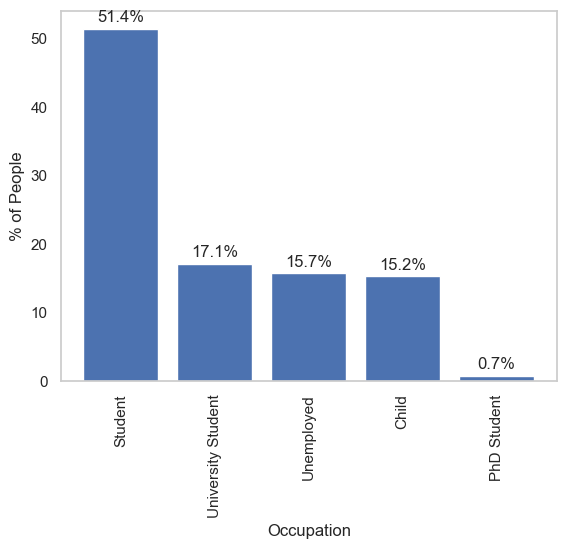

In [74]:


# Filter rows where the "Occupation" column is in ['Unemployed', 'University Student', 'PhD Student', 'Child']
filtered_census = census[census["Occupation"].isin(['Unemployed', 'University Student', 'PhD Student', 'Student', 'Child'])]

# Calculate the percentage of people in each occupation category
filtered_occupation_counts = filtered_census["Occupation"].value_counts(normalize=True) * 100

# Create a bar graph to visualize the occupation percentages
fig, ax = plt.subplots()
occupation_counts_bar = ax.bar(filtered_occupation_counts.index, filtered_occupation_counts.values)

# Add the percentage as a label on top of each bar
for bar in occupation_counts_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center',
                 va='bottom')

# Set the labels for the x-axis and y-axis
ax.set_xlabel("Occupation")
ax.set_ylabel("% of People")

# Remove the grid lines from the plot
ax.grid(False)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Display the graph
plt.show()

#save the figure
fig.savefig('occupation_countplot.png', bbox_inches='tight') 

# Examine Old Age Care

In [75]:
# Filter rows where the "Age" column is greater than or equal to 65
senior_counts = census[census["Age"] >= 65]["Age"].value_counts()

# Calculate the percentage of seniors (Age >= 65)
senior_percentage = senior_counts.sum() / len(census) * 100

# Print the result
print(f'The percentage of seniors (Age >= 65) in the town is {senior_percentage:.1f}%')

The percentage of seniors (Age >= 65) in the town is 9.9%


In [76]:
# Filter rows where the "Age" column is greater than or equal to 70
senior_counts = census[census["Age"] >= 70]["Age"].value_counts()

# Calculate the percentage of seniors (Age >= 70)
senior_percentage = senior_counts.sum() / len(census) * 100

# Print the result
print(f'The percentage of seniors (Age >= 70) in the town is {senior_percentage:.1f}%')

The percentage of seniors (Age >= 70) in the town is 6.8%


In [77]:
# Filter rows where the "Age" column is greater than or equal to 75
senior_counts = census[census["Age"] >= 75]["Age"].value_counts()

# Calculate the percentage of seniors (Age >= 75)
senior_percentage = senior_counts.sum() / len(census) * 100

# Print the result
print(f'The percentage of seniors (Age >= 75) in the town is {senior_percentage:.1f}%')

The percentage of seniors (Age >= 75) in the town is 4.3%


# Examine Spending In school

In [78]:
# Filter rows where the "Occupation" column is equal to "Student"
Student_counts = census[census["Occupation"] == "Student"]["Occupation"].value_counts()
print(Student_counts)

# Calculate the total number of individuals in the census dataset
total_count = len(census)

# Calculate the percentage of unemployed individuals
Student_percentage = Student_counts.sum() / total_count * 100

# Print the result
print(f'The percentage of Student individuals in the town is {Student_percentage:.1f}%')

Occupation
Student    2014
Name: count, dtype: int64
The percentage of Student individuals in the town is 19.9%


# Examine Commuters

In [79]:
#checking for total number of University Student
census["Occupation"].value_counts()["University Student"]

669

In [80]:
#checking for total number of PhD Student
census["Occupation"].value_counts()["PhD Student"]

27

In [81]:
#checking for total number of Associate professor
census["Occupation"].value_counts()["Associate Professor"]

6